# 3D Plotting 🌪️

The results can be found in the `results` folder. The plots are interactive and can be zoomed in and out.
- Best way to view them is in a browser.

In [1]:
import numpy as np
import torch

from optimizers.adam_clara import Adam_CLARA
from optimizers.sgd_clara import SGD_CLARA

from src.Plotting_3D import *

---
### Parameters 🧹

In [ ]:
# Optimizer Classes
optimizers = {
    # 'SGD': torch.optim.SGD,
    'ADAM': torch.optim.Adam,
    'Adam_CLARA': Adam_CLARA,
    # 'SGD_CLARA': SGD_CLARA,
}

# Function-specific Starting Points
per_func_startpoints = {
    "sphere": {
        'SGD': np.array([1.0, 1.0]),
        'ADAM': np.array([1.0, 1.0]),
        'Adam_CLARA': np.array([-1.0, -1.0]),
        'SGD_CLARA': np.array([1.0, 1.0])
    },
    "sphere_noisy": {
        'SGD': np.array([1.0, 1.0]),
        'ADAM': np.array([1.0, 1.0]),
        'Adam_CLARA': np.array([-1.0, -1.0]),
        'SGD_CLARA': np.array([1.0, 1.0])
    },
    "ellipsoid": {
        'SGD': np.array([1.0, 1.0]),
        'ADAM': np.array([1.0, 1.0]),
        'Adam_CLARA': np.array([-1.0, -1.0]),
        'SGD_CLARA': np.array([1.0, 1.0])
    },
    "ellipsoid_noisy": {
        'SGD': np.array([1.0, 1.0]),
        'ADAM': np.array([1.0, 1.0]),
        'Adam_CLARA': np.array([-1.0, -1.0]),
        'SGD_CLARA': np.array([1.0, 1.0])
    },
    "rosenbrock": {
        'SGD': np.array([-1.0, 1.0]),  # np.array([-1.5, 1.5]),
        'ADAM': np.array([-1.0, 1.0]),  # np.array([1.5, -1.5]),
        'Adam_CLARA': np.array([-1.0, 1.0]),
        'SGD_CLARA': np.array([-1.0, 1.0]),  # np.array([1.0, -1.0]),
    },
    "himmelblau": {
        'SGD': np.array([-4.0, 4.0]),
        'ADAM': np.array([-4.0, 4.0]),  # np.array([4.0, -4.0]),
        'Adam_CLARA': np.array([-4.0, 4.0]),  # np.array([-3.0, 3.0]),
        'SGD_CLARA': np.array([-4.0, 4.0])  # np.array([3.0, -3.0]),
    },
    "beale": {
        'SGD': np.array([1.0, 1.0]),
        'ADAM': np.array([1.0, 1.0]),  # np.array([2.5, 2.0]),
        'Adam_CLARA': np.array([1.0, 1.0]),  # np.array([-1.0, 1.0]),
        'SGD_CLARA': np.array([1.0, 1.0])  # np.array([1.5, -1.5]),
    },
    "eggholder": {
        'SGD': np.array([500, 300]),
        'ADAM': np.array([500, 300]),  # np.array([300, 500]),
        'Adam_CLARA': np.array([500, 300]),  # np.array([400, 400]),
        'SGD_CLARA': np.array([500, 300])  # np.array([450, 450]),
    },
    "three_hump_camel": {
        'SGD': np.array([1.0, 1.0]),
        'ADAM': np.array([1.0, 1.0]),  # np.array([-1.0, -1.0]),
        'Adam_CLARA': np.array([1.0, 1.0]),  # np.array([1.5, -1.5]),
        'SGD_CLARA': np.array([1.0, 1.0])  # np.array([-1.5, 1.5]),
    },
    "ackley": {
        'SGD': np.array([2.0, 2.0]),
        'ADAM': np.array([2.0, 2.0]),  # np.array([-2.0, -2.0]),
        'Adam_CLARA': np.array([2.0, 2.0]),  # np.array([2.5, -2.5]),
        'SGD_CLARA': np.array([2.0, 2.0])  # np.array([-2.5, 2.5]),
    }
}

# Steps per Optimizer
steps_dict = {
    'SGD': 100,
    'ADAM': 20,
    'Adam_CLARA': 20,
    'SGD_CLARA': 100,
}

# Learning Rate per Optimizer
lr = 1e2  # 1e2
lr_dict = {
    'SGD': lr,  # 0.01,
    'ADAM': lr,  # 0.005,
    'Adam_CLARA': lr,  # 0.005,
    'SGD_CLARA': lr  # 0.01,
}

# Global Optimum
global_optima = {
    "sphere": np.array([0.0, 0.0]),
    "sphere_noisy": np.array([0.0, 0.0]),
    "ellipsoid": np.array([0.0, 0.0]),
    "ellipsoid_noisy": np.array([0.0, 0.0]),
    "rosenbrock": np.array([1.0, 1.0]),
    "himmelblau": np.array([3.0, 2.0]),
    "beale": np.array([3.0, 0.5]),
    "eggholder": np.array([512.0, 404.2319]),
    "three_hump_camel": np.array([0.0, 0.0]),
    "ackley": np.array([0.0, 0.0]),
}

# Plot-Ranges per Function
func_bounds = {
    "sphere": [-5, 5],
    "sphere_noisy": [-5, 5],
    "ellipsoid": [-5, 5],
    "ellipsoid_noisy": [-5, 5],
    "rosenbrock": [-2, 2],
    "himmelblau": [-6, 6],
    "beale": [-4.5, 4.5],
    "eggholder": [0, 600],
    "three_hump_camel": [-3, 3],
    "ackley": [-5, 5],
}

-----
### Main Function 🚀


--- Generating plot for: sphere ---
✅ Plot saved as ./results/sphere_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/sphere_optimization_paths_2d_matplotlib.pdf


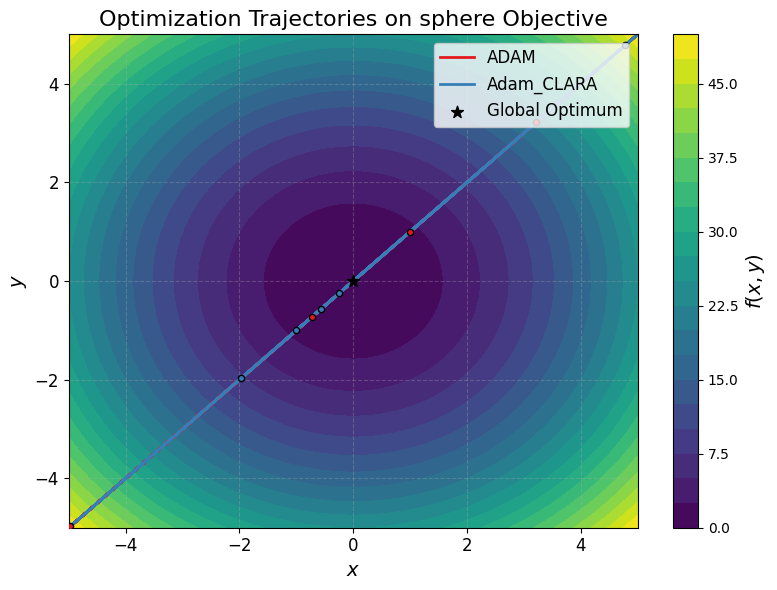

✅ Plot saved as ./results/sphere_animation.html

--- Generating plot for: sphere_noisy ---
✅ Plot saved as ./results/sphere_noisy_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/sphere_noisy_optimization_paths_2d_matplotlib.pdf


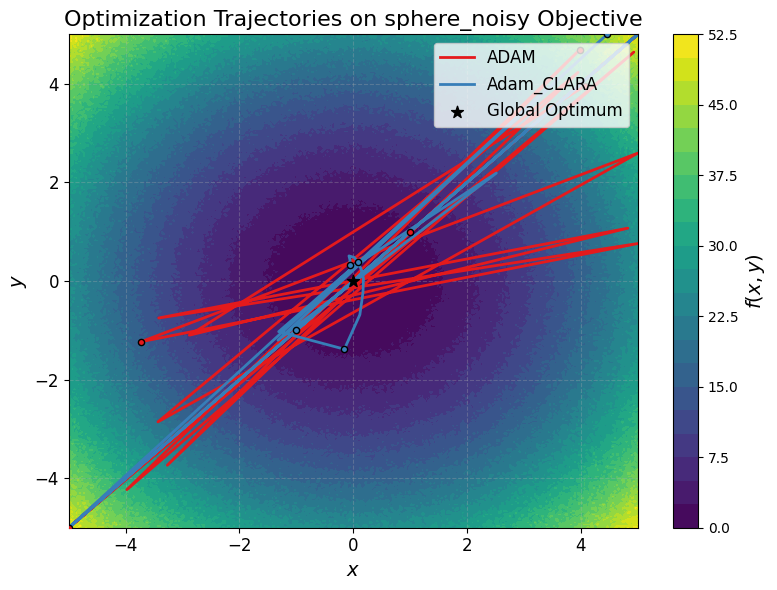

✅ Plot saved as ./results/sphere_noisy_animation.html

--- Generating plot for: ellipsoid ---
✅ Plot saved as ./results/ellipsoid_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/ellipsoid_optimization_paths_2d_matplotlib.pdf


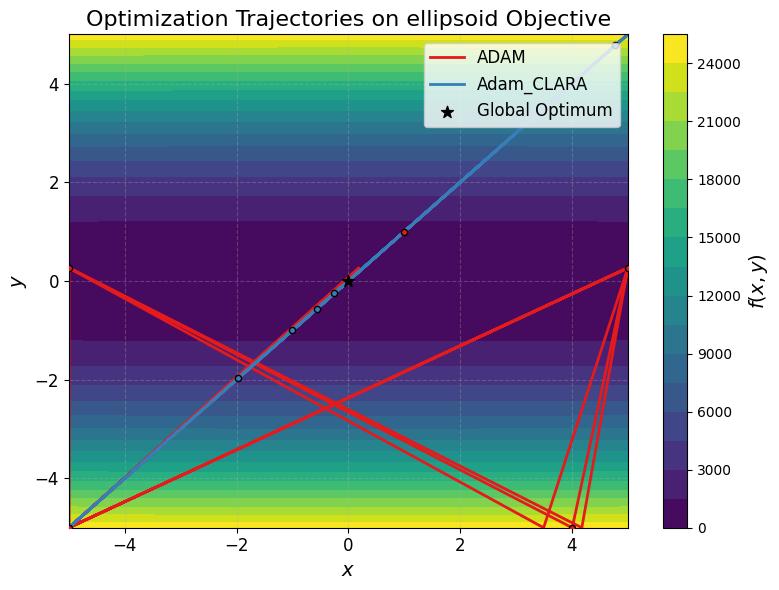

✅ Plot saved as ./results/ellipsoid_animation.html

--- Generating plot for: ellipsoid_noisy ---
✅ Plot saved as ./results/ellipsoid_noisy_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/ellipsoid_noisy_optimization_paths_2d_matplotlib.pdf


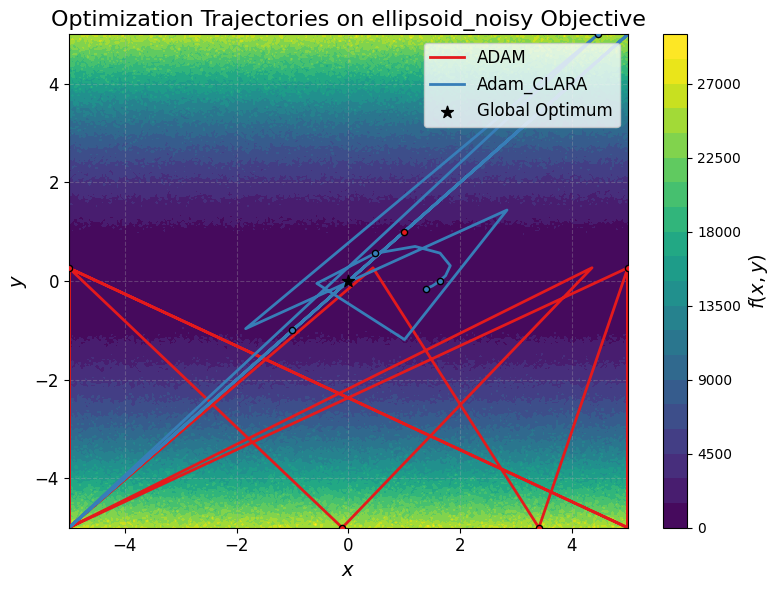

✅ Plot saved as ./results/ellipsoid_noisy_animation.html

--- Generating plot for: rosenbrock ---
✅ Plot saved as ./results/rosenbrock_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/rosenbrock_optimization_paths_2d_matplotlib.pdf


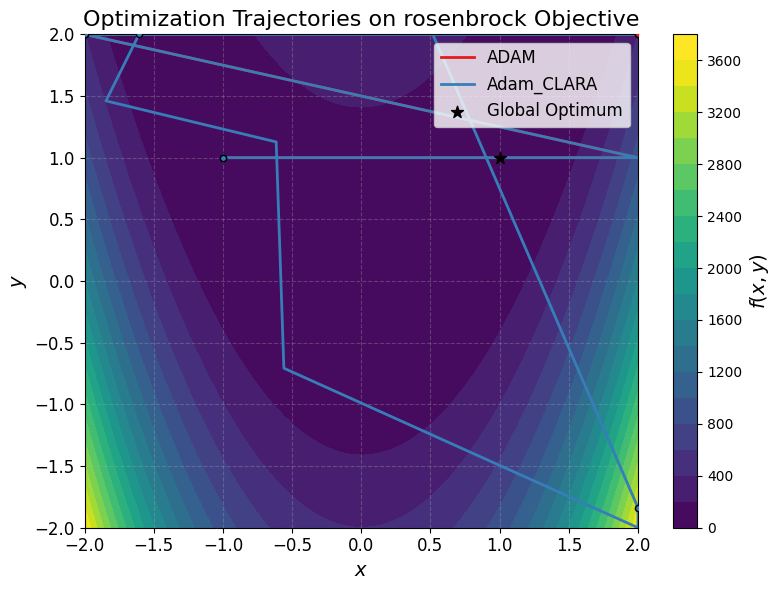

✅ Plot saved as ./results/rosenbrock_animation.html

--- Generating plot for: himmelblau ---
✅ Plot saved as ./results/himmelblau_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/himmelblau_optimization_paths_2d_matplotlib.pdf


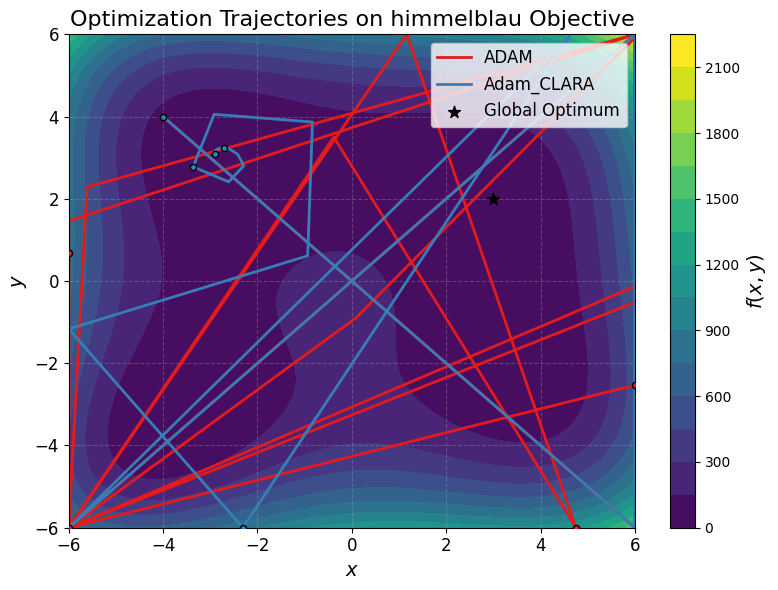

✅ Plot saved as ./results/himmelblau_animation.html

--- Generating plot for: beale ---
✅ Plot saved as ./results/beale_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/beale_optimization_paths_2d_matplotlib.pdf


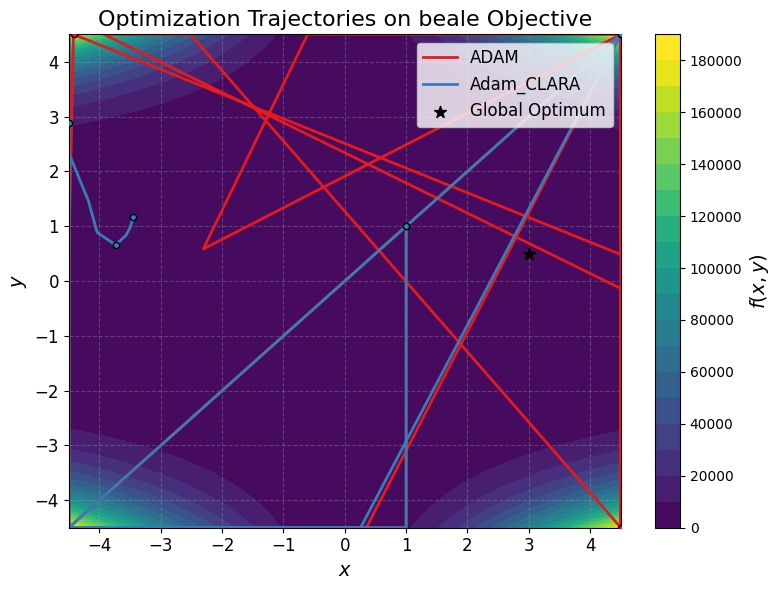

✅ Plot saved as ./results/beale_animation.html

--- Generating plot for: eggholder ---
✅ Plot saved as ./results/eggholder_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/eggholder_optimization_paths_2d_matplotlib.pdf


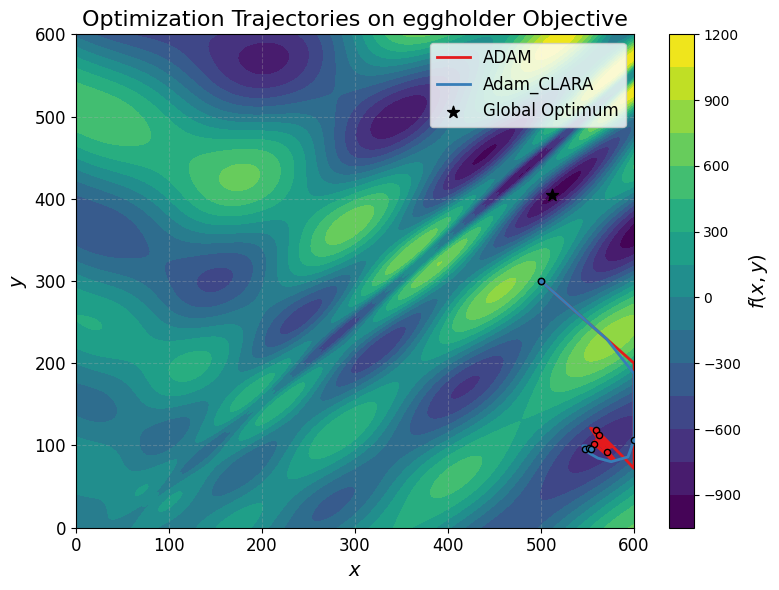

✅ Plot saved as ./results/eggholder_animation.html

--- Generating plot for: three_hump_camel ---
✅ Plot saved as ./results/three_hump_camel_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/three_hump_camel_optimization_paths_2d_matplotlib.pdf


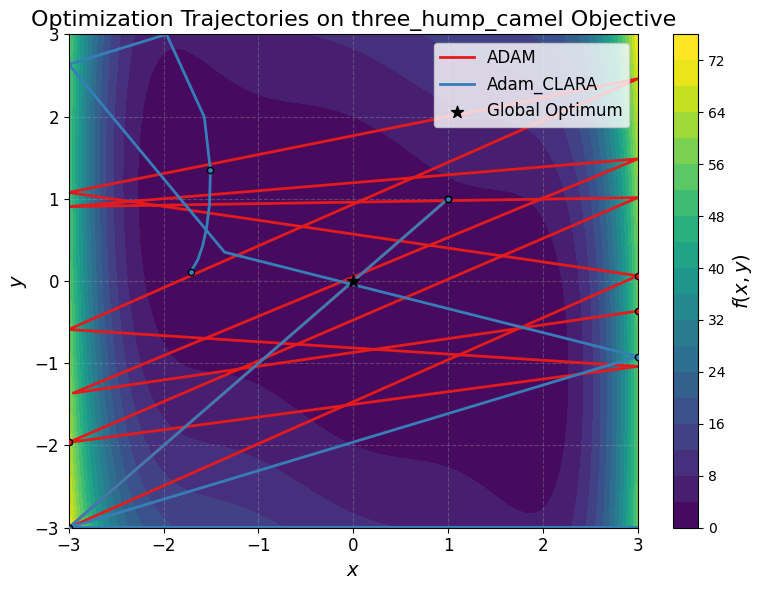

✅ Plot saved as ./results/three_hump_camel_animation.html

--- Generating plot for: ackley ---
✅ Plot saved as ./results/ackley_optimization_paths.html
✅ Plot gespeichert als PDF: ./results/ackley_optimization_paths_2d_matplotlib.pdf


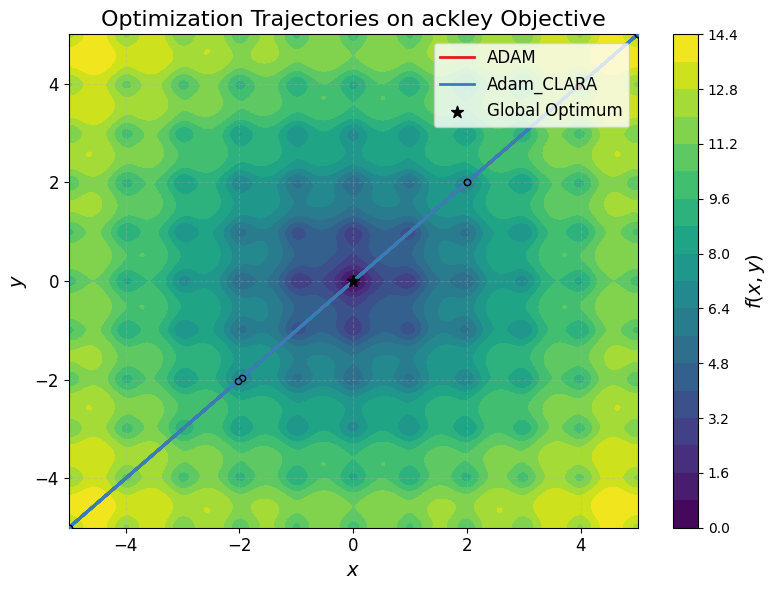

✅ Plot saved as ./results/ackley_animation.html


In [3]:
if __name__ == "__main__":

    # Liste der Funktionen
    func_names = list(global_optima.keys())

    for func_name in func_names:
        print(f"\n--- Generating plot for: {func_name} ---")
        func_np, func_torch = get_func_and_torch(func_name)
        
        optimize_and_plot(
            func_np=func_np,
            func_torch=func_torch,
            global_optimum=global_optima[func_name],
            optimizers=optimizers,
            start_points=per_func_startpoints[func_name],
            bounds=func_bounds[func_name],
            steps_dict=steps_dict,
            lr_dict=lr_dict,
            gradient_clip=5.0,  
            func_name=func_name  
        )
                
        optimize_and_plot_2d(
            func_np=func_np,
            func_torch=func_torch,
            global_optimum=global_optima[func_name],
            optimizers=optimizers,
            start_points=per_func_startpoints[func_name],
            bounds=func_bounds[func_name],
            steps_dict=steps_dict,
            lr_dict=lr_dict,
            gradient_clip=5.0,  
            func_name=func_name,
            show=True 
        )
        
        optimize_and_animate(
            func_np=func_np,
            func_torch=func_torch,
            global_optimum=global_optima[func_name],
            optimizers=optimizers,
            start_points=per_func_startpoints[func_name],
            bounds=func_bounds[func_name],
            steps_dict=steps_dict,
            lr_dict=lr_dict,
            gradient_clip=5.0,
            func_name=func_name
        )